In [3]:
from bunkatopics import BunkaTopics
import pandas as pd

In [4]:
df = pd.read_csv("../data/imdb.csv", index_col=[0])
df = df.sample(500, random_state=42)
df = df[["imdb", "description"]].dropna()

In [6]:
model = BunkaTopics(df, 
                    text_var = 'description',
                    index_var = 'imdb',
                    extract_terms=True,
                    terms_embeddings=False,
                    docs_embeddings=True,
                    embeddings_model="distiluse-base-multilingual-cased-v1",
                    multiprocessing=True,
                    language="en",
                    sample_size_terms=500,
                    terms_limit=500,
                    terms_ents=True,
                    terms_ngrams=(1, 2),
                    terms_ncs=True,
                    terms_include_pos=["NOUN", "PROPN", "ADJ"],
                    terms_include_types=["PERSON", "ORG"])

2022-05-23 23:19:53,625 - Extracting Terms...
  0%|                                                                                | 0/498 [00:00<?, ?it/s]2022-05-23 23:20:17,123 - loaded 'en_core_web_sm' spaCy language pipeline
2022-05-23 23:20:17,139 - loaded 'en_core_web_sm' spaCy language pipeline
2022-05-23 23:20:17,161 - loaded 'en_core_web_sm' spaCy language pipeline
2022-05-23 23:20:17,179 - loaded 'en_core_web_sm' spaCy language pipeline
2022-05-23 23:20:17,188 - loaded 'en_core_web_sm' spaCy language pipeline
2022-05-23 23:20:17,205 - loaded 'en_core_web_sm' spaCy language pipeline
2022-05-23 23:20:17,232 - loaded 'en_core_web_sm' spaCy language pipeline
100%|██████████████████████████████████████████████████████████████████████| 498/498 [00:53<00:00,  9.23it/s]
2022-05-23 23:20:48,250 - Extracting Docs Embeddings...
100%|██████████████████████████████████████████████████████████████████████| 498/498 [00:28<00:00, 17.62it/s]


UMAP(n_components=5, random_state=42, verbose=True)
Mon May 23 23:21:16 2022 Construct fuzzy simplicial set
Mon May 23 23:21:17 2022 Finding Nearest Neighbors
Mon May 23 23:21:18 2022 Finished Nearest Neighbor Search
Mon May 23 23:21:19 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Mon May 23 23:21:21 2022 Finished embedding


In [16]:
topics = model.get_clusters(topic_number= 20,
                    top_terms = 3,
                    term_type = "lemma",
                    top_terms_included = 100,
                    ngrams = [2])

UMAP(random_state=42, verbose=True)
Mon May 23 23:23:09 2022 Construct fuzzy simplicial set
Mon May 23 23:23:09 2022 Finding Nearest Neighbors
Mon May 23 23:23:09 2022 Finished Nearest Neighbor Search
Mon May 23 23:23:09 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Mon May 23 23:23:10 2022 Finished embedding


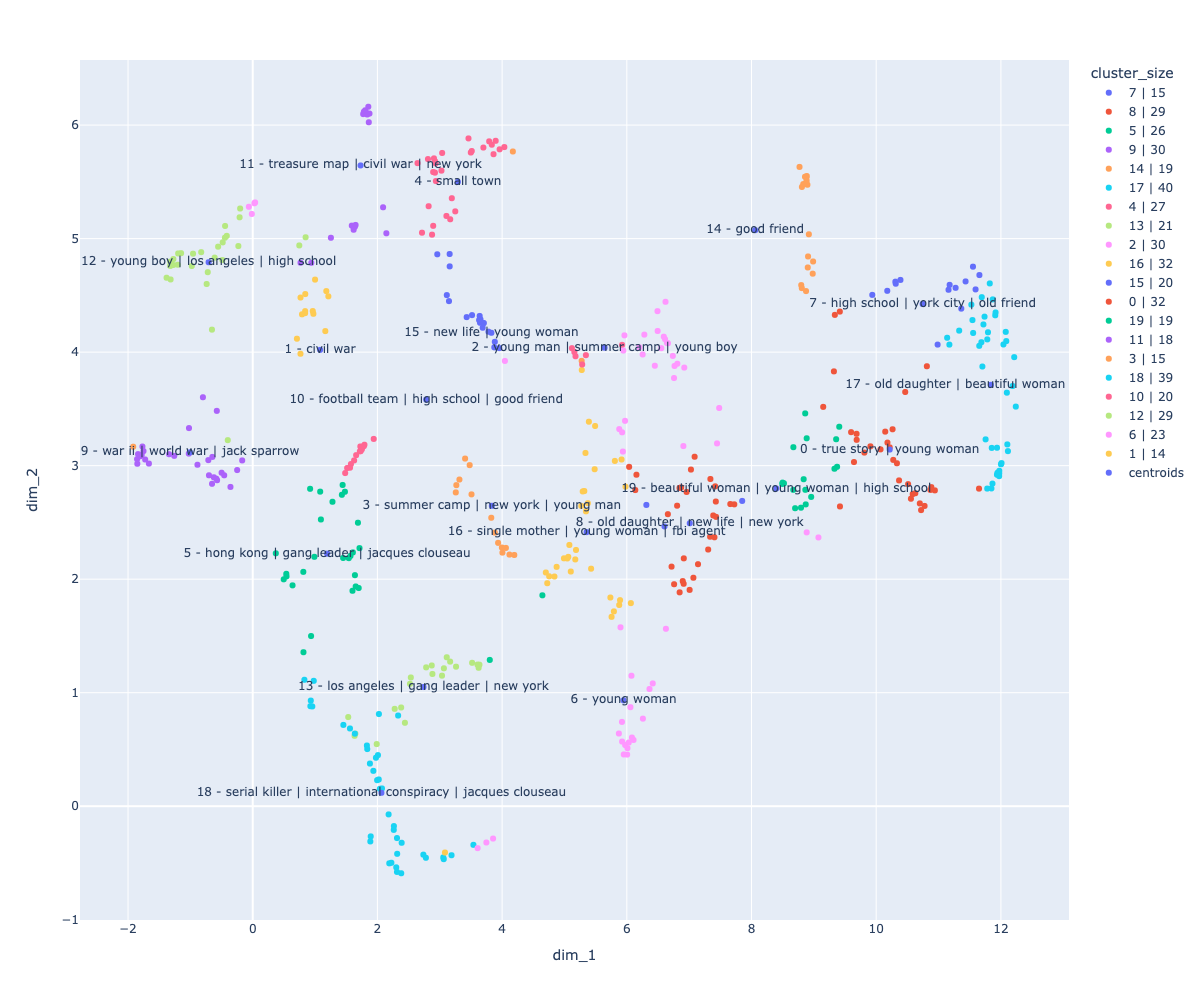

In [15]:
fig = model.visualize_clusters(width=1000, height=1000)
fig.show()